## Importing the Dataset

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('spam.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


## Exploratory Data Analysis

In [56]:
df.drop(['Unnamed: 0', 'label'], axis=1, inplace = True)
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0


In [57]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [58]:
df.columns = ['text','label']
df.head()

,text,label
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0


In [59]:
# Number and Percentage of Spam and Ham Emails
ham, spam = df['label'].value_counts()
print("No of Ham emails: ", ham)
print("No of Spam emails: ", spam)

No of Ham emails:  3672
No of Spam emails:  1499


## Data Preprocessing

In [60]:
import string
import re

In [61]:
def clean_text(text):
    text = text.replace("Subject:","")
    text = text.replace("we 're", "we are")
    text = text.replace("ect","etc")
    text = text.replace("you 're","you are")
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x))

### Adding additional features - length and Percentage of punctuation

In [62]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['text_len'] = df['text'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['text'].apply(lambda x: count_punct(x))
df.head()

,text,label,cleaned_text,text_len,punct
0,Subject: enron methanol ; meter # : 988291\nth...,0,enron methanol meter this is a f...,261,5.7
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,hpl nom for january see attached f...,75,10.7
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,neon retreat ho ho ho we re around to tha...,1975,4.2
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main t...,366,1.4
4,Subject: re : indian springs\nthis deal is to ...,0,re indian springs this deal is to book the ...,267,2.6


## Tokenization

In [63]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,text,label,cleaned_text,text_len,punct,tokens
0,Subject: enron methanol ; meter # : 988291\nth...,0,enron methanol meter this is a f...,261,5.7,"[enron, methanol, meter, this, is, a, follow, ..."
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,hpl nom for january see attached f...,75,10.7,"[hpl, nom, for, january, see, attached, file, ..."
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,neon retreat ho ho ho we re around to tha...,1975,4.2,"[neon, retreat, ho, ho, ho, we, re, around, to..."
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main t...,366,1.4,"[photoshop, windows, office, cheap, main, tren..."
4,Subject: re : indian springs\nthis deal is to ...,0,re indian springs this deal is to book the ...,267,2.6,"[re, indian, springs, this, deal, is, to, book..."


## Lemmatization and Removing Stopwords

In [64]:
import nltk
from nltk.corpus import stopwords
all_stopwords =  set(stopwords.words('english'))
all_stopwords.remove('not')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])
lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_text'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

,text,label,cleaned_text,text_len,punct,tokens,lemmatized_text
0,Subject: enron methanol ; meter # : 988291\nth...,0,enron methanol meter this is a f...,261,5.7,"[enron, methanol, meter, this, is, a, follow, ...",enron methanol meter follow note gave monday p...
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,hpl nom for january see attached f...,75,10.7,"[hpl, nom, for, january, see, attached, file, ...",hpl nom january see attached file hplnol xl hp...
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,neon retreat ho ho ho we re around to tha...,1975,4.2,"[neon, retreat, ho, ho, ho, we, re, around, to...",neon retreat ho ho ho around wonderful time ye...
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main t...,366,1.4,"[photoshop, windows, office, cheap, main, tren...",photoshop window office cheap main trending ab...
4,Subject: re : indian springs\nthis deal is to ...,0,re indian springs this deal is to book the ...,267,2.6,"[re, indian, springs, this, deal, is, to, book...",indian spring deal book teco pvr revenue under...


## Data Visualization

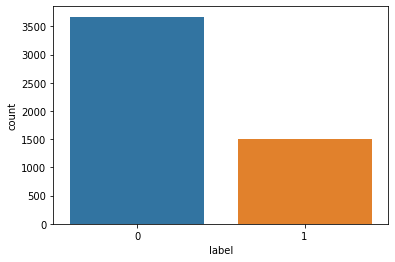

In [66]:
sns.countplot(x='label', data=df);

In [67]:
ham = df[df['label']==0]
spam = df[df['label']==1]
#convert to list
ham_list = ham['lemmatized_text'].tolist()
spam_list = spam['lemmatized_text'].tolist()
filtered_spam = ("").join(spam_list) #convert the list into a string of spam
filtered_ham = ("").join(ham_list) #convert the list into a string of ham

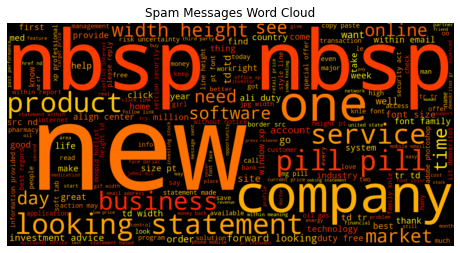

In [80]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000, height=1000, min_font_size=12, margin=0, colormap="autumn").generate(filtered_spam)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Spam Messages Word Cloud")
plt.show()

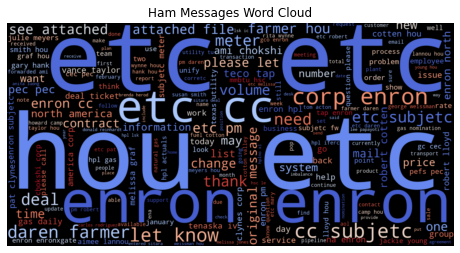

In [83]:
wordcloud = WordCloud(width=2000, height=1000, min_font_size=12, margin=0, colormap="coolwarm_r").generate(filtered_ham)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Ham Messages Word Cloud")
plt.show()

## Vectorization

In [70]:
X = df[['lemmatized_text', 'text_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(5171, 3)
(5171,)


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3619, 3)
(1552, 3)
(3619,)
(1552,)


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_text'])
tfidf_test = tfidf.transform(X_test['lemmatized_text'])
X_train_vect = pd.concat([X_train[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)
X_train_vect.head()

,text_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,14700,14701,14702,14703,14704,14705,14706,14707,14708,14709,14710,14711,14712,14713,14714,14715,14716,14717,14718,14719,14720,14721,14722,14723,14724,14725,14726,14727,14728,14729,14730,14731,14732,14733,14734,14735,14736,14737,14738,14739
0,251,5.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6682,2.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014527,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,595,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,256,3.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1265,14.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training Classifiers and testing their Performance

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1121
           1       0.98      0.55      0.71       431

    accuracy                           0.87      1552
   macro avg       0.92      0.78      0.81      1552
weighted avg       0.89      0.87      0.86      1552

Naive Bayes Accuracy : 87.31% 



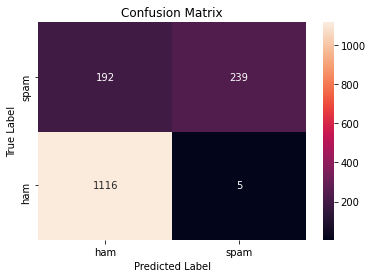

In [74]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))
print("Naive Bayes Accuracy : {:.2f}% \n".format(accuracy_score(y_test, naive_bayes_pred) * 100))

# Confusion Matrix
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
ax.set_ylim([0,2])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1121
           1       0.95      0.98      0.97       431

    accuracy                           0.98      1552
   macro avg       0.97      0.98      0.98      1552
weighted avg       0.98      0.98      0.98      1552

Logistic Regression Accuracy : 98.20% 



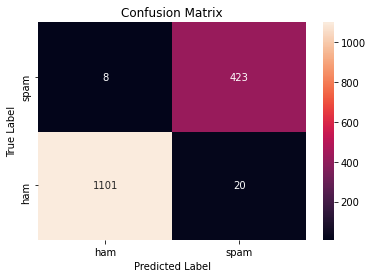

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))
print("Logistic Regression Accuracy : {:.2f}% \n".format(accuracy_score(y_test, log_reg_pred) * 100))
# Confusion Matrix
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
ax.set_ylim([0,2])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()